# Problem Statement :
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

# Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

Feature Name | Description Store | Store number Date | Week of Sales Weekly_Sales | Sales for the given store in that week Holiday_Flag | If it is a holiday week Temperature | Temperature on the day of the sale Fuel_Price | Cost of the fuel in the region CPI | Consumer Price Index Unemployment | Unemployment Rate

# Task to perform
You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
    
a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

g. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

# DATA LOADING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\Walmart DataSet.csv')
data1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data1 = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\Walmart DataSet.csv')
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index('Date', inplace=True)
data1.tail()

<ipython-input-4-54036ad69913>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date'] = pd.to_datetime(data1['Date'])


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667
2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667


# EDA

In [5]:
data1 = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\Walmart DataSet.csv')
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index('Date', inplace=True)

# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a = int(input("Enter the store id: "))
store = data1[data1['Store'] == a]

# Group the 'Weekly_Sales' column by month and sum the values
sales = store['Weekly_Sales'].resample('M').sum()
sales.head(10)

<ipython-input-5-7f99d262fc41>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date'] = pd.to_datetime(data1['Date'])


Enter the store id: 11


Date
2010-01-31    1182490.46
2010-02-28    5588513.75
2010-03-31    5294268.18
2010-04-30    5243098.98
2010-05-31    8090105.69
2010-06-30    3968182.92
2010-07-31    5097508.24
2010-08-31    5419267.34
2010-09-30    5136244.35
2010-10-31    6335815.94
Freq: M, Name: Weekly_Sales, dtype: float64

In [6]:
sales.dtypes

dtype('float64')

In [7]:
data1 = pd.read_csv(r'C:\Users\SAMIM IMTIAZ\Desktop\Walmart DataSet.csv')
data1.set_index('Date', inplace=True)
#There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:22


Weekly_Sales    float64
dtype: object

In [8]:
sales.head(5)

,Weekly_Sales
Date,
01-04-2011,951588.37
01-06-2012,1102857.37
01-07-2011,1077491.68
01-10-2010,905987.17
02-03-2012,974866.65


In [9]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace = True)

<ipython-input-9-ac9ee794628b>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])


In [10]:
sales.head(5)

,Weekly_Sales
Date,
2011-01-04,951588.37
2012-01-06,1102857.37
2011-01-07,1077491.68
2010-01-10,905987.17
2012-02-03,974866.65


**NOTE: NOW WE HAVE TWO PANDAS DATAFRAME SLAES AND DATA1 WE CAN ACCESS WEEKLY_SALES FROM BOTH DATAFRAME**

# Task a
Investigate if weekly sales are affected by the unemployment rate and identify which stores are most impacted.

In [103]:
# Function to calculate correlations
def calculate_correlations(data):
    correlations = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1]
    correlations.index = correlations.index.get_level_values(0)
    return correlations

In [105]:
print(correlations)

Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
Name: Unemployment, dtype: float64


In [12]:
# Group the data by store and calculate the correlation between unemployment rate and weekly sales
correlations = data1.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1]
correlations.index = correlations.index.get_level_values(0)

# Multiply the correlations by -1
correlations = -correlations

# Sort the correlations numerically
sorted_correlations = correlations.sort_values(ascending=False)

# Add "+" or "-" sign to the correlations
formatted_correlations = sorted_correlations.apply(lambda x: f"{x:+.6f}")

print(formatted_correlations)

Store
38    +0.785290
44    +0.780076
39    +0.384681
42    +0.356355
41    +0.350630
4     +0.337015
17    +0.263600
3     +0.230413
37    +0.221287
5     +0.207043
43    +0.201954
9     +0.191534
13    +0.171633
7     +0.165382
40    +0.112528
32    +0.099455
1     +0.097955
20    +0.095341
23    +0.077169
16    +0.070864
26    +0.066899
31    +0.064738
8     +0.052580
11    +0.020339
27    +0.014275
24    +0.012261
12    +0.009286
25    +0.004958
45    +0.004041
34    -0.017010
22    -0.039043
6     -0.044251
2     -0.066325
15    -0.078905
29    -0.084682
33    -0.101175
19    -0.101464
10    -0.131908
28    -0.136671
18    -0.139179
30    -0.201862
14    -0.210786
21    -0.218367
35    -0.483865
36    -0.833734
Name: Unemployment, dtype: object


In [13]:
# Sort the correlations in descending order and find the store number with the highest absolute correlation coefficient
most_impacted_store = correlations.abs().sort_values(ascending=False).index[0]

print(f"The store most impacted by unemployment is Store {most_impacted_store}")

The store most impacted by unemployment is Store 36


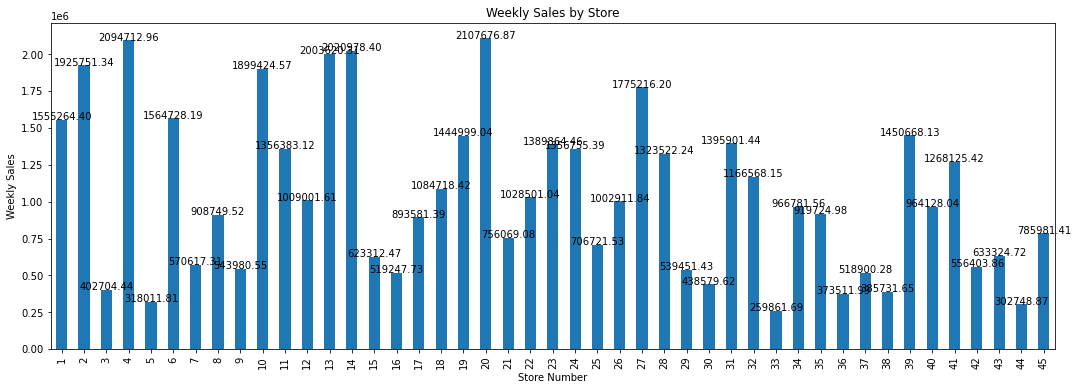

In [14]:
# import matplotlib.pyplot as plt

# Group the data by store and calculate the mean weekly sales
weekly_sales_by_store = data1.groupby('Store')['Weekly_Sales'].mean()

# Create a bar plot
plt.figure(figsize=(18,6))
weekly_sales_by_store.plot(kind='bar')
plt.title('Weekly Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')

# Add text labels to the bars
for i, value in enumerate(weekly_sales_by_store.values):
    plt.text(i, value + 100, f"{value:.2f}", ha='center')

plt.show()

In [15]:
correlations = data1.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1]
correlations.index = correlations.index.get_level_values(0)

most_impacted_store = correlations.idxmax()
most_unaffected_store = correlations.idxmin()

print(f"The store most impacted by unemployment is Store {most_impacted_store}")
print(f"The most unaffected store is Store {most_unaffected_store}")

The store most impacted by unemployment is Store 36
The most unaffected store is Store 38


In [16]:
# Store numbers that have unemployment
store_numbers_with_unemployment = correlations[correlations < 0].index.tolist()

print(store_numbers_with_unemployment)

[1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 16, 17, 20, 23, 24, 25, 26, 27, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [17]:
# Count Store numbers that have unemployment
count = len(store_numbers_with_unemployment)
print(count)

29


# Key Findings of Task 1
Most Impacted Store: Store 36 is the most impacted by unemployment.

Total Unemployment Stores: There are 29 stores affected by unemployment.

Unemployment Stores List: The stores affected by unemployment are: [1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 16, 17, 20, 23, 24, 25, 26, 27, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 45].

Weekly Sales of Most Impacted Store: The weekly sales of Store 36, the most impacted by unemployment, is $373,511.98.

# Task b: Analyzing seasonal trends in weekly sales.
    
Step 1: Visualize the Data

To identify seasonal trends, we'll create a time series plot of weekly sales.

In [18]:
data1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [112]:
# Function to visualize time series data
def visualize_time_series(data, title):
    plt.figure(figsize=(12,6))
    plt.plot(data)
    plt.title=(title)
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.show()

In [114]:
# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data1['Weekly_Sales'], model='additive', period=52)

In [115]:
# Visualize decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

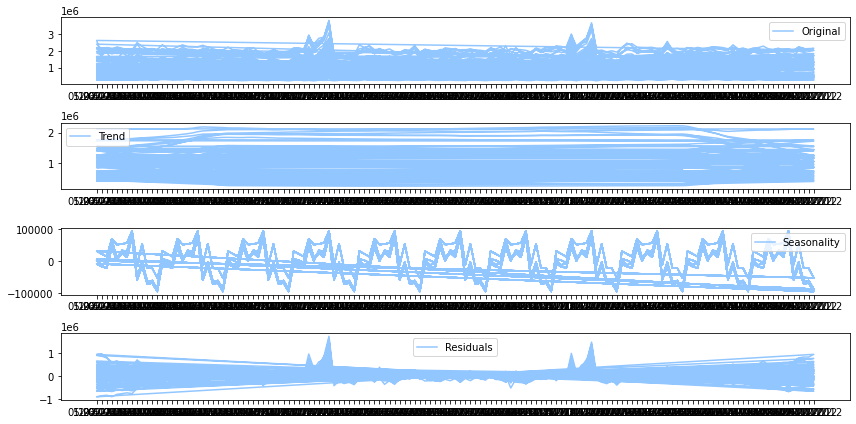

In [116]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(data1['Weekly_Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

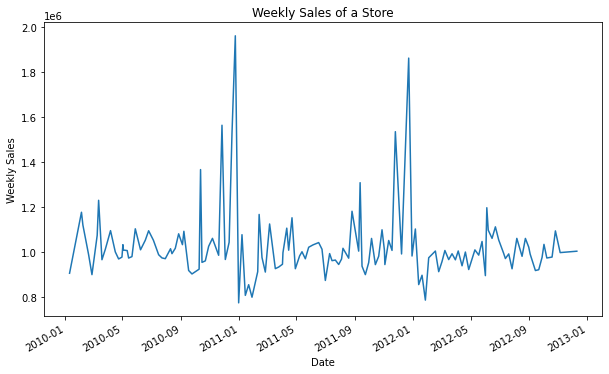

In [19]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

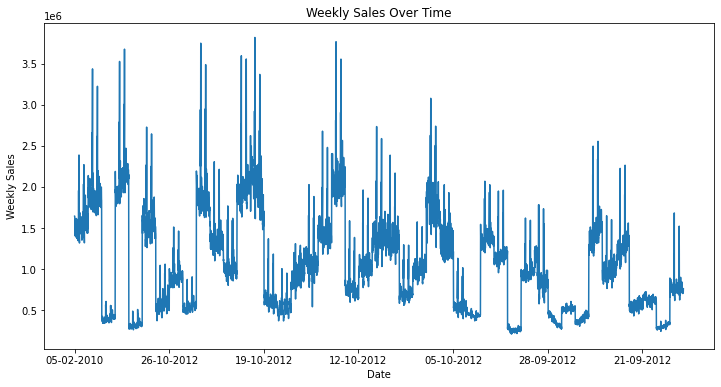

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
data1['Weekly_Sales'].plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

**Step 2: Decompose the Time Series**

**We'll use the seasonal_decompose function from the statsmodels library to decompose the time series into trend, seasonal, and residual components.**

<Figure size 432x288 with 0 Axes>

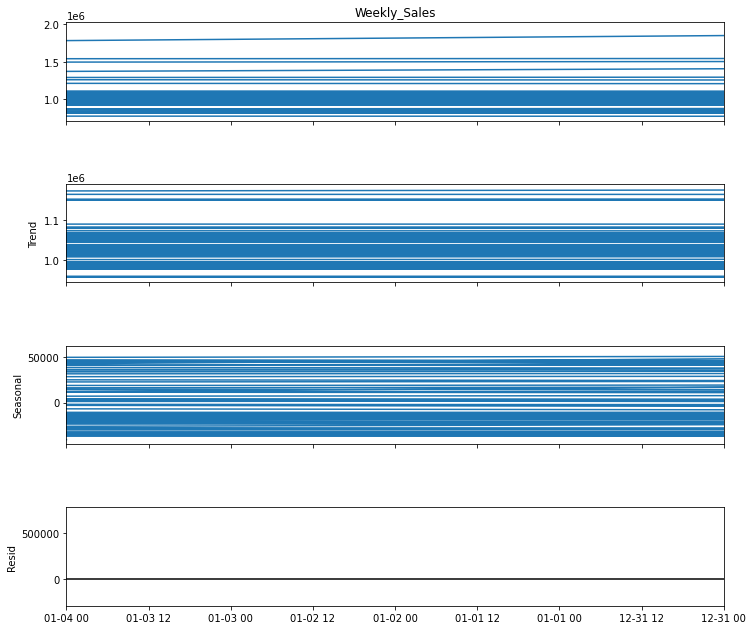

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [24]:
# Perform Augmented Dickey-Fuller test to check for stationarity
result = adfuller(data1['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.624149498578304
p-value: 0.00011655869699901207


In [25]:
# Perform Augmented Dickey-Fuller test to check for stationarity
result = adfuller(sales.Weekly_Sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.8221842063656895
p-value: 0.05517411860540037


In [26]:
# Check if the p-value is less than 0.05 to confirm stationarity
if result[1] < 0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

The series is not stationary


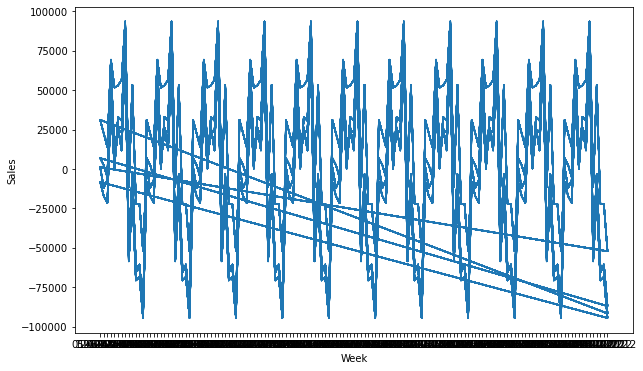

In [27]:
# Plot the seasonal pattern
plt.figure(figsize=(10,6))
plt.plot(seasonal)
plt.title=('Seasonal Pattern')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [28]:
# Identify the peaks in sales during certain periods of the year
peaks = seasonal[(seasonal > seasonal.mean())]
print('Peaks in sales during certain periods of the year:')
print(peaks)

Peaks in sales during certain periods of the year:
Date
05-02-2010     1163.106180
26-02-2010    61112.300249
05-03-2010    11992.221350
12-03-2010    26358.896297
19-03-2010    11789.989552
                  ...     
24-08-2012    43189.057625
31-08-2012      270.909442
07-09-2012    33057.864572
14-09-2012    30621.572399
21-09-2012    88007.767792
Name: seasonal, Length: 3339, dtype: float64


In [29]:
# Sort the peaks in sales by date and then by peak sales
peaks_sorted = peaks.sort_index().sort_values(ascending=False)

# Print the sorted peaks
print('Sorted Peaks in Sales:')
print(peaks_sorted)

Sorted Peaks in Sales:
Date
24-09-2010    93557.400434
24-12-2010    93557.400434
21-09-2012    93557.400434
21-09-2012    93557.400434
21-09-2012    93557.400434
                  ...     
02-12-2011      270.909442
03-12-2010      270.909442
04-06-2010      270.909442
04-06-2010      270.909442
04-06-2010      270.909442
Name: seasonal, Length: 3339, dtype: float64


In [30]:
# Group the data by store and find the peak sales for each store
peak_sales_store_wise = data1.groupby('Store')['Weekly_Sales'].apply(lambda x: x[x > x.mean()])

# Reset the index to include the store information
peak_sales_store_wise_reset = peak_sales_store_wise.reset_index(level=0)

# Rename the columns
peak_sales_store_wise_reset.columns = ['Store', 'Peak_Sales']

# Sort the peak sales store-wise by date and then by peak sales
peak_sales_store_wise_sorted = peak_sales_store_wise_reset.sort_values(by=['Store', 'Peak_Sales'], ascending=[True, False])

# Print the sorted peak sales store-wise
print('Peak Sales Store-wise:')
print(peak_sales_store_wise_sorted)

Peak Sales Store-wise:
            Store  Peak_Sales
Date                         
24-12-2010      1  2387950.20
23-12-2011      1  2270188.99
25-11-2011      1  2033320.66
26-11-2010      1  1955624.11
06-04-2012      1  1899676.88
...           ...         ...
01-07-2011     45   791495.25
03-09-2010     45   790144.70
16-03-2012     45   788340.23
09-07-2010     45   787062.00
29-04-2011     45   786561.61

[2627 rows x 2 columns]


# Task c: Examine the relationship between temperature and weekly sales.
To examine the relationship, we can use a scatter plot to visualize the data and calculate the correlation coefficient.

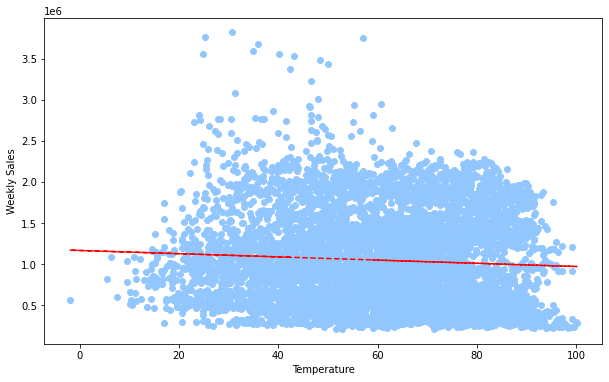

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of temperature vs weekly sales
plt.figure(figsize=(10,6))
plt.scatter(data1['Temperature'], data1['Weekly_Sales'])

# Add regression line
z = np.polyfit(data1['Temperature'], data1['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(data1['Temperature'],p(data1['Temperature']),"r--")

plt.title=('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [119]:
# Calculate correlation coefficient
correlation_coefficient = data1['Temperature'].corr(data1['Weekly_Sales'])
print('Correlation Coefficient:', correlation_coefficient)

Correlation Coefficient: -0.06381001317946955


**Observation**

In [120]:
# Interpret correlation coefficient
if abs(correlation_coefficient) < 0.2:
    print('Very weak relationship')
elif abs(correlation_coefficient) < 0.4:
    print('Weak relationship')
elif abs(correlation_coefficient) < 0.6:
    print('Moderate relationship')
elif abs(correlation_coefficient) < 0.8:
    print('Strong relationship')
else:
    print('Very strong relationship')

Very weak relationship


# Task d: Investigate how the Consumer Price Index (CPI) affects weekly sales across various stores.
To investigate the relationship between CPI and weekly sales, we can use a scatter plot to visualize the data and calculate the correlation coefficient.

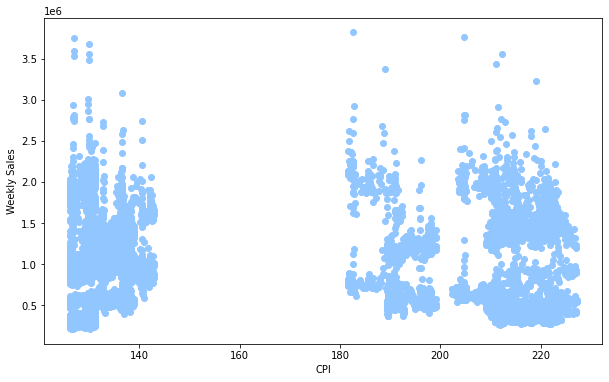

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of CPI vs weekly sales
plt.figure(figsize=(10,6))
plt.scatter(data1['CPI'], data1['Weekly_Sales'])
plt.title=('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

In [123]:
# Calculate correlation coefficient
correlation_coefficient = data1['CPI'].corr(data1['Weekly_Sales'])
print('Correlation Coefficient:', correlation_coefficient)

Correlation Coefficient: -0.0726341620401763


In [124]:
# Interpret correlation coefficient
if abs(correlation_coefficient) < 0.2:
    print('Very weak relationship')
elif abs(correlation_coefficient) < 0.4:
    print('Weak relationship')
elif abs(correlation_coefficient) < 0.6:
    print('Moderate relationship')
elif abs(correlation_coefficient) < 0.8:
    print('Strong relationship')
else:
    print('Very strong relationship')

Very weak relationship


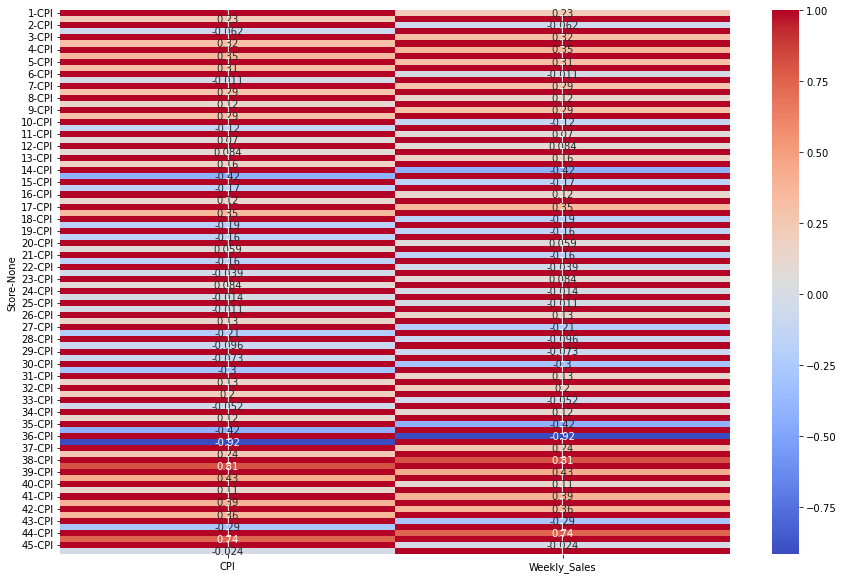

In [127]:
# Heatmap to show correlation between CPI and weekly sales for different stores
plt.figure(figsize=(15,10))
sns.heatmap(data1.groupby('Store')[['CPI', 'Weekly_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title=('Correlation between CPI and Weekly Sales for Different Stores')
plt.show()

# Task e: Identify the top-performing stores based on historical data.
To do this, we can calculate the average weekly sales for each store and then rank the stores based on their average sales.

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Develop targeted marketing strategies
targeted_marketing_strategies = data1.groupby('Store')['Weekly_Sales'].apply(lambda x: x[x > x.mean()])
print('Targeted marketing strategies:')
print(targeted_marketing_strategies)

Targeted marketing strategies:
Store  Date      
1      05-02-2010    1643690.90
       12-02-2010    1641957.44
       19-02-2010    1611968.17
       02-04-2010    1594968.28
       07-05-2010    1603955.12
                        ...    
45     01-06-2012     837144.63
       08-06-2012     795133.00
       15-06-2012     821498.18
       22-06-2012     822569.16
       06-07-2012     843361.10
Name: Weekly_Sales, Length: 2627, dtype: float64


In [129]:
# Optimize operational efficiency
operational_efficiency = data1.groupby('Store', group_keys=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].apply(lambda x: x[x > x.mean()])
print('Operational efficiency:')
print(operational_efficiency)

Operational efficiency:
            Temperature  Fuel_Price         CPI  Unemployment
Date                                                         
05-02-2010          NaN         NaN         NaN         8.106
12-02-2010          NaN         NaN         NaN         8.106
19-02-2010          NaN         NaN         NaN         8.106
26-02-2010          NaN         NaN         NaN         8.106
05-03-2010          NaN         NaN         NaN         8.106
...                 ...         ...         ...           ...
28-09-2012        64.88       3.997  192.013558         8.684
05-10-2012        64.89       3.985  192.170412         8.667
12-10-2012          NaN       4.000  192.327265         8.667
19-10-2012          NaN       3.969  192.330854         8.667
26-10-2012        58.85       3.882  192.308899         8.667

[6435 rows x 4 columns]


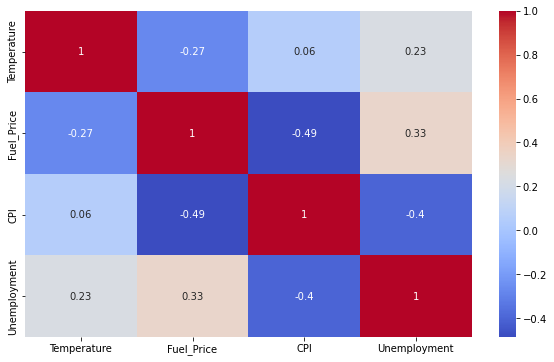

In [131]:
# Visualize operational efficiency
plt.figure(figsize=(10,6))
sns.heatmap(operational_efficiency.corr(), annot=True, cmap='coolwarm')
plt.title=('Correlation between Operational Efficiency Metrics')
plt.show()

**INSIGHTS**

--Temperature and Fuel Price: Weak negative correlation (-0.27). 
  This suggests that as temperature increases, fuel prices tend to decrease slightly.

--Temperature and CPI: Weak positive correlation (0.06). 
  This suggests that as temperature increases, CPI tends to increase slightly, but the relationship is very weak.

--Temperature and Unemployment: Weak positive correlation (0.23). 
  This suggests that as temperature increases, unemployment tends to increase slightly.

--Fuel Price and CPI: Moderate negative correlation (-0.49). 
  This suggests that as fuel prices increase, CPI tends to decrease.

--Fuel Price and Unemployment: Weak positive correlation (0.33). 
 This suggests that as fuel prices increase, unemployment tends to increase slightly.

--CPI and Unemployment: Moderate negative correlation (-0.4). 
 This suggests that as CPI increases, unemployment tends to decrease.

In [35]:
# Calculate average weekly sales for each store
average_sales = data1.groupby('Store')['Weekly_Sales'].mean()

# Rank stores based on average sales
ranked_stores = average_sales.sort_values(ascending=False)

print(ranked_stores)

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64


In [36]:
# Calculate average weekly sales for each store
avg_weekly_sales = data1.groupby('Store')['Weekly_Sales'].mean().reset_index()

In [37]:
# Identify top-performing stores
top_performing_stores = avg_weekly_sales[avg_weekly_sales['Weekly_Sales'] > 2000000]
print('Top-performing stores:')
print(top_performing_stores)

Top-performing stores:
    Store  Weekly_Sales
3       4  2.094713e+06
12     13  2.003620e+06
13     14  2.020978e+06
19     20  2.107677e+06


In [38]:
# Identify middle-performing stores
middle_performing_stores = avg_weekly_sales[(avg_weekly_sales['Weekly_Sales'] > 1500000) & (avg_weekly_sales['Weekly_Sales'] < 2000000)]
print('Middle-performing stores:')
print(middle_performing_stores)

Middle-performing stores:
    Store  Weekly_Sales
0       1  1.555264e+06
1       2  1.925751e+06
5       6  1.564728e+06
9      10  1.899425e+06
26     27  1.775216e+06


In [39]:
# Identify low-performing stores
low_performing_stores = avg_weekly_sales[avg_weekly_sales['Weekly_Sales'] < 1000000]
print('Low-performing stores:')
print(low_performing_stores)

Low-performing stores:
    Store   Weekly_Sales
2       3  402704.441049
4       5  318011.810490
6       7  570617.308671
7       8  908749.518392
8       9  543980.552378
14     15  623312.474965
15     16  519247.730070
16     17  893581.390420
20     21  756069.083357
24     25  706721.532657
28     29  539451.428741
29     30  438579.616224
32     33  259861.692028
33     34  966781.559441
34     35  919724.979580
35     36  373511.992797
36     37  518900.281958
37     38  385731.653287
39     40  964128.040490
41     42  556403.863147
42     43  633324.723147
43     44  302748.866014
44     45  785981.408531


In [40]:
data1.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [41]:
sales.columns

Index(['Weekly_Sales'], dtype='object')

In [42]:
# Analyze store-specific data
store_specific_data = data1.groupby('Store')[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment']].mean()
print('Store-specific data:')
print(store_specific_data)

Store-specific data:
       Weekly_Sales  Holiday_Flag  Temperature         CPI  Unemployment
Store                                                                   
1      1.555264e+06       0.06993    68.306783  215.996892      7.610420
2      1.925751e+06       0.06993    68.216364  215.646311      7.623846
3      4.027044e+05       0.06993    71.434196  219.391531      7.176986
4      2.094713e+06       0.06993    62.253357  128.679669      5.964692
5      3.180118e+05       0.06993    69.410140  216.565581      6.295406
6      1.564728e+06       0.06993    69.700000  217.553197      6.606902
7      5.706173e+05       0.06993    39.720280  193.664243      8.585734
8      9.087495e+05       0.06993    62.513986  219.439026      6.091846
9      5.439806e+05       0.06993    67.775175  219.626689      6.099881
10     1.899425e+06       0.06993    72.241189  128.679669      8.362965
11     1.356383e+06       0.06993    72.480769  219.391531      7.176986
12     1.009002e+06       0.06

In [43]:
# Develop targeted marketing strategies
targeted_marketing_strategies = data1.groupby('Store')['Weekly_Sales'].apply(lambda x: x[x > x.mean()])
print('Targeted marketing strategies:')
print(targeted_marketing_strategies)

Targeted marketing strategies:
Store  Date      
1      05-02-2010    1643690.90
       12-02-2010    1641957.44
       19-02-2010    1611968.17
       02-04-2010    1594968.28
       07-05-2010    1603955.12
                        ...    
45     01-06-2012     837144.63
       08-06-2012     795133.00
       15-06-2012     821498.18
       22-06-2012     822569.16
       06-07-2012     843361.10
Name: Weekly_Sales, Length: 2627, dtype: float64


In [44]:
# Optimize operational efficiency
operational_efficiency = data1.groupby('Store')[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].apply(lambda x: x[x > x.mean()])
print('Operational efficiency:')
print(operational_efficiency)

Operational efficiency:
            Temperature  Fuel_Price         CPI  Unemployment
Date                                                         
05-02-2010          NaN         NaN         NaN         8.106
12-02-2010          NaN         NaN         NaN         8.106
19-02-2010          NaN         NaN         NaN         8.106
26-02-2010          NaN         NaN         NaN         8.106
05-03-2010          NaN         NaN         NaN         8.106
...                 ...         ...         ...           ...
28-09-2012        64.88       3.997  192.013558         8.684
05-10-2012        64.89       3.985  192.170412         8.667
12-10-2012          NaN       4.000  192.327265         8.667
19-10-2012          NaN       3.969  192.330854         8.667
26-10-2012        58.85       3.882  192.308899         8.667

[6435 rows x 4 columns]


<ipython-input-44-f4cd996f1312>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  operational_efficiency = data1.groupby('Store')[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].apply(lambda x: x[x > x.mean()])


# Task f: Determine the worst-performing store and calculate the difference between the highest and lowest performing stores.
Based on the ranked list of stores we generated earlier, the worst-performing store is Store 3, with an average weekly sales of $402,704.

To calculate the difference between the highest and lowest performing stores, we can subtract the average weekly sales of the worst-performing store from the average weekly sales of the best-performing store:

**SARIMAX model to forecast sales for each store. We'll use the statsmodels library in Python to implement the SARIMAX model**

In [45]:
# Identify the worst-performing store
worst_performing_store = ranked_stores.idxmin()
print(f"The worst-performing store is Store {worst_performing_store}")

The worst-performing store is Store 33


In [46]:
# Identify the best-performing store
best_performing_store = ranked_stores.idxmax()
print(f"The best-performing store is Store {best_performing_store}")

The best-performing store is Store 20


In [47]:
# Calculate the difference between the highest and lowest performing stores
difference = ranked_stores.max() - ranked_stores.min()
print(f"The difference between the highest and lowest performing stores is: ${difference:.2f}")

The difference between the highest and lowest performing stores is: $1847815.18


In [48]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store33 = data1[data1.Store == 33]
# there are about 45 different stores in this dataset.

sales33 = pd.DataFrame(store33.Weekly_Sales.groupby(store33.index).sum())
sales33.dtypes


#remove date from index to change its dtype because it clearly isnt acceptable.
sales33.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales33['Date'] = pd.to_datetime(sales33['Date'])
# resetting date back to the index
sales33.set_index('Date',inplace = True)

<ipython-input-48-5e7102303d0b>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales33['Date'] = pd.to_datetime(sales33['Date'])


In [49]:
y1=sales.Weekly_Sales
y2=sales33.Weekly_Sales

In [50]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

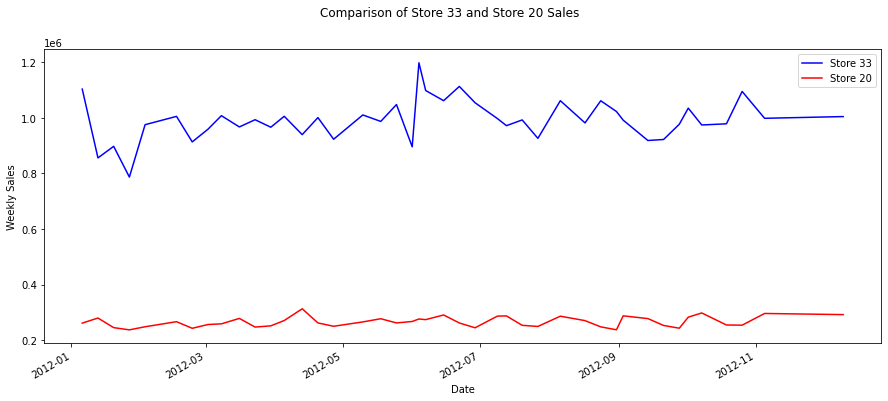

In [51]:
y1['2012'].plot(figsize=(15, 6), legend=True, color='blue', label='Store 33')
y2['2012'].plot(figsize=(15, 6), legend=True, color='red', label='Store 20')

plt.ylabel('Weekly Sales')
plt.suptitle('Comparison of Store 33 and Store 20 Sales')
plt.legend()
plt.show()

**Clearly we can see the irregularities**

In [52]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [53]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0317      0.311     -3.318      0.001      -1.641      -0.422
ar.L2         -0.9307      0.448     -2.077      0.038      -1.809      -0.053
ar.L3         -0.7537      0.392     -1.922      0.055      -1.522       0.015
ar.L4         -0.6106      0.197     -3.098      0.002      -0.997      -0.224
ma.L1         -2.4578      0.319     -7.710      0.000      -3.083      -1.833
ma.L2          1.9346      0.655      2.954      0.003       0.651       3.218
ma.L3         -0.4748      0.343     -1.383      0.167      -1.148       0.198
ar.S.L52      -0.4776      0.178     -2.684      0.007      -0.826      -0.129
sigma2      1.142e+11   4.98e-12   2.29e+22      0.000    1.14e+11    1.14e+11


C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-54-765ce2254a55>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


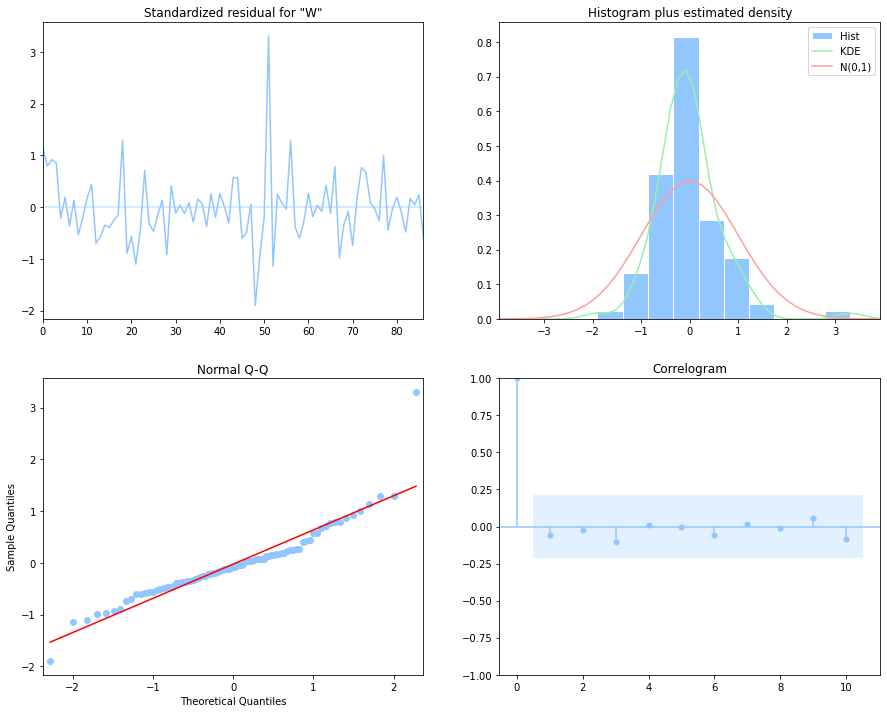

In [54]:
results = mod.fit()
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [55]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

<ipython-input-56-4d1356b90131>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


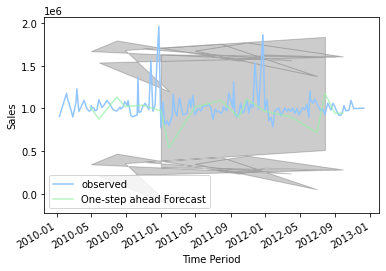

In [56]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [57]:
# Generate forecasts for the next 12 weeks
forecast = results.get_forecast(steps=12)

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [59]:
# Create a DataFrame to store the forecasts
forecasts_df = pd.DataFrame(predicted_values)

In [60]:
# Print the first few rows of the forecasts DataFrame
print(forecasts_df.head())

     predicted_mean
143    9.399434e+05
144    8.652497e+05
145    1.011053e+06
146    8.988399e+05
147    6.944224e+05


In [61]:
# Calculate summary statistics for each store
summary_stats = forecasts_df.describe()
print(summary_stats)

       predicted_mean
count    1.200000e+01
mean     7.857769e+05
std      1.352401e+05
min      6.074153e+05
25%      6.740563e+05
50%      7.808599e+05
75%      8.949001e+05
max      1.011053e+06


# Task g:Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [63]:
# Define the number of weeks to forecast
weeks_to_forecast = 12

In [64]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data1, test_size=0.2, random_state=42)

In [65]:
# Forecast sales for each store separately
for store in data1['Store'].unique():
    store_data = data1[data1['Store'] == store]
    store_train_data, store_test_data = train_test_split(store_data, test_size=0.2, random_state=42)

In [66]:
# Create and fit the SARIMAX model for each store
mod = sm.tsa.statespace.SARIMAX(store_train_data['Weekly_Sales'], order=(4, 4, 3), seasonal_order=(1, 1, 0, 52))
results = mod.fit()

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may

In [67]:
# Generate forecasts for each store
forecast = results.forecast(steps=12)

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [88]:
# Evaluate the performance of the model
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

In [89]:
# Calculate evaluation metrics
mse = ((y_forecasted - y_truth) ** 2).mean()
mae = (np.abs(y_forecasted - y_truth)).mean()
mape = (np.abs((y_forecasted - y_truth) / y_truth)).mean() * 100
rmspe = np.sqrt(((y_forecasted - y_truth) / y_truth) ** 2).mean() * 100

In [90]:
print('Mean Squared Error (MSE):', round(mse, 2))
print('Mean Absolute Error (MAE):', round(mae, 2))
print('Mean Absolute Percentage Error (MAPE):', round(mape, 2))
print('Root Mean Squared Percentage Error (RMSPE):', round(rmspe, 2))

Mean Squared Error (MSE): 23262968056.57
Mean Absolute Error (MAE): 119621.23
Mean Absolute Percentage Error (MAPE): 12.6
Root Mean Squared Percentage Error (RMSPE): 12.6


In [68]:
# Iterate over each store
for store in data1['Store'].unique():
    
# Get the sales data for the current store
    store_data = data1[data1['Store'] == store]['Weekly_Sales']

In [69]:
# Convert the index values to datetime objects
store_data.index = pd.to_datetime(store_data.index)

<ipython-input-69-eecf9373f954>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  store_data.index = pd.to_datetime(store_data.index)


In [70]:
# Now we can access a specific date
store_data = store_data['2012-07-27':]

In [71]:
# Fit the SARIMAX model
mod = sm.tsa.statespace.SARIMAX(store_data, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52))
results = mod.fit()

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

In [72]:
# Get prediction results
forecast = results.forecast(steps=weeks_to_forecast) 

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
# Print the forecasted sales for the current store
print(f"Forecasted Sales for Store {store}:")
print(forecast)

Forecasted Sales for Store 45:
15      957056.03
16     1404573.30
17     2198957.21
18     3436331.73
19     5212820.83
20     7624548.48
21    10767638.65
22    14738215.31
23    19632402.43
24    25546323.98
25    32576103.93
26    40817866.25
Name: predicted_mean, dtype: float64


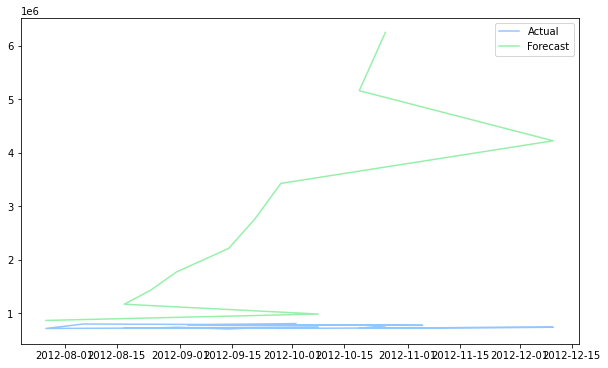

In [92]:
# Plot forecasted values against actual values
plt.figure(figsize=(10,6))
plt.plot(store_data['2012-07-27':], label='Actual')
plt.plot(pred_dynamic.predicted_mean, label='Forecast')  # Use pred_dynamic instead of pred
plt.legend()
plt.show()

In [76]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<ipython-input-95-7ec4e3870bda>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='Observed', figsize=(12, 8))


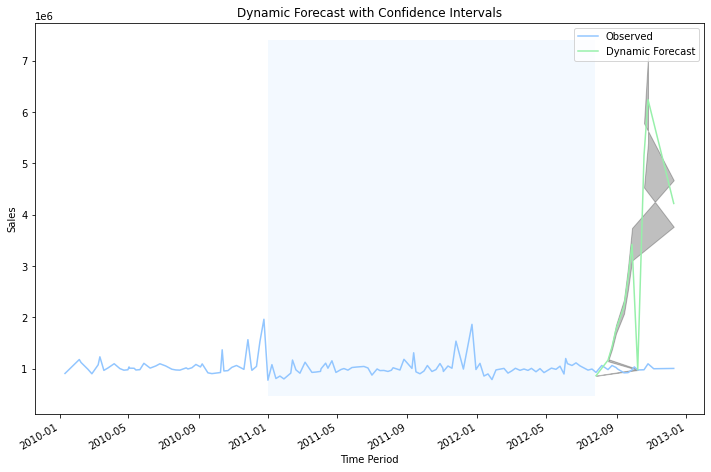

In [95]:
# Plot the observed data
ax = y1['2010':].plot(label='Observed', figsize=(12, 8))

# Plot the dynamic forecast
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

# Fill the area between the confidence intervals
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# Fill the area to indicate the forecast period
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1], alpha=.1, zorder=-1)

# Set labels and title
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
ax.set_title('Dynamic Forecast with Confidence Intervals')

# Show the legend and plot
plt.legend()
plt.show()

In [96]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27     861826.14
2012-10-08     981487.17
2012-08-17    1165036.47
2012-08-24    1423394.42
2012-08-31    1767481.40
2012-09-14    2208217.79
2012-09-21    2756523.97
2012-09-28    3423320.32
2012-12-10    4219527.22
2012-10-19    5156065.05
2012-10-26    6243854.19
Name: predicted_mean, dtype: float64


In [97]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    1061134.37
2012-09-03     991127.01
2012-10-02    1034448.07
2012-10-08     973812.79
2012-11-05     997868.63
2012-12-10    1004039.84
2012-09-14     918049.28
2012-08-17     981273.26
2012-10-19     978027.95
2012-09-21     921612.53
2012-08-24    1060906.75
2012-10-26    1094422.69
2012-07-27     925731.21
2012-09-28     976479.51
2012-08-31    1022270.86
Name: Weekly_Sales, dtype: float64


In [98]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 2450512.2


In [99]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 19477917.609998837


In [100]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAMIM IMTIAZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [101]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

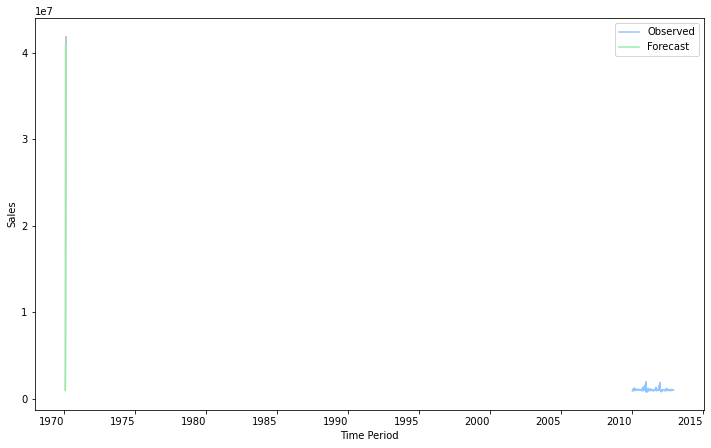

In [102]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot
ax = y1.plot(label='Observed', figsize=(12, 8))

# Plot the forecast
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# Fill the area between the confidence intervals
ax.fill_between(pred_uc.conf_int().index, pred_uc.conf_int().iloc[:, 0], pred_uc.conf_int().iloc[:, 1], color='k', alpha=.25)

# Set labels and title
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

# Show the legend and plot
plt.legend()
plt.show()